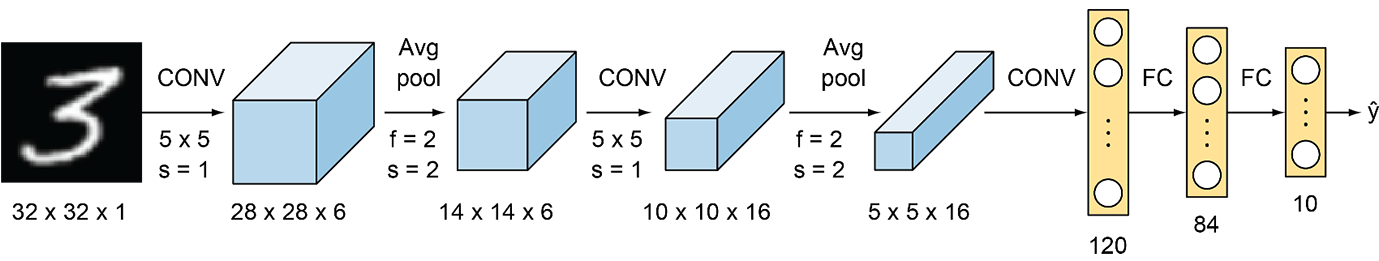

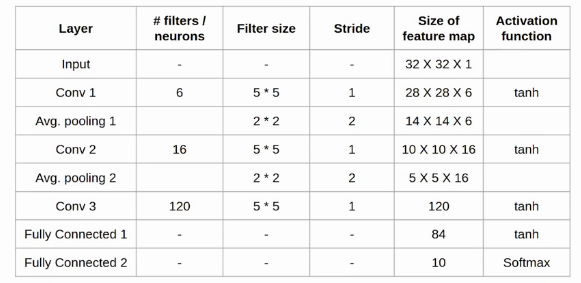

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [35]:
class LeNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.relu = nn.ReLU()  # LeNet used tanh, we gonna use Relu (better), at that time Relu wasn't invented.
        self.pool = nn.AvgPool2d(kernel_size = (2, 2), stride = (2, 2))
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size = (5, 5), stride = (1, 1))
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size = (5, 5), stride = (1, 1))
        self.conv3 = nn.Conv2d(in_channels = 16, out_channels = 120, kernel_size = (5, 5), stride = (1, 1))
        self.linear1 = nn.Linear(in_features = 120, out_features = 84)
        self.linear2 = nn.Linear(in_features = 84, out_features = 10)
        
        
    def forward(self, x):
        x = self.relu(self.conv1(x))      # first layer:- Conv with Relu Activation and storing output in x.
        x = self.pool(x)                  # second layer:- Pooling with output of first layer "x" as an input.
        x = self.relu(self.conv2(x))      # third layer:- 2nd Conv with Relu Activation and storing output in x.
        x = self.pool(x)                  # fourth layer:- 2nd Pooling with output of third layer "x" as an input.
        x = self.relu(self.conv3(x))      # fifth layer:- 3rd Convo with Relu Activation and storing output in x.
        
        # Now after 5th layer, the output is in shape "num_examples x 120 x 1 x 1".
        # We want to convert it into "num_examples x 120" to convert it into single dimension.
        x = x.reshape(x.shape[0], -1)    # now this Conv block is of "num_examples x 120" that is 1 dimension only.
        # Now we can apply FC layer
        
        x = self.relu(self.linear1(x))   # input is "num_examples x 120" that is 1 dimension only.
        x = self.linear2(x)              # input is "num_examples x 84" and we will not apply any activation function here.
        
        return x

In [45]:
x = torch.randn(64, 1, 32, 32)
print(x.shape)

torch.Size([64, 1, 32, 32])


In [46]:
model = LeNet()

In [47]:
print(model(x).shape)   

torch.Size([64, 10])



We gave x as an input with shape [64, 1, 32, 32] where 64 is the batch of images and 1,32,32 is the image dimensions so total 64 images with those dimensions are going in the LeNet as an input and after all those layers we are getting final output as expected [64, 10], where 10 is the no of dimensions of final layer.

We can also do 'model.forward(x)' instead of 'model(x)' which is same because in nn.Module it is defind as if you give 'model(x)', the forward method is initialized there and it will automatically catch values of 'x' and it will do forward pass so need to do 'model.forward(x)', even though 'model.forward(x)' is more readable.